In [40]:
import numpy as np
import scipy.constants as scc
import sys 
import os
from matplotlib import pyplot as plt
import pandas as pd

In [41]:
os.listdir('Data')

['0.1microfarad2.csv',
 'ardcapac2kiloohm.csv',
 'arduinocapacitance.csv',
 'finishcooloriignal.csv',
 'kapton2.csv',
 'paper1.csv',
 'paper4.csv',
 'sugarsolution2.csv',
 'test2.csv']

time step = 15.090 micro-s


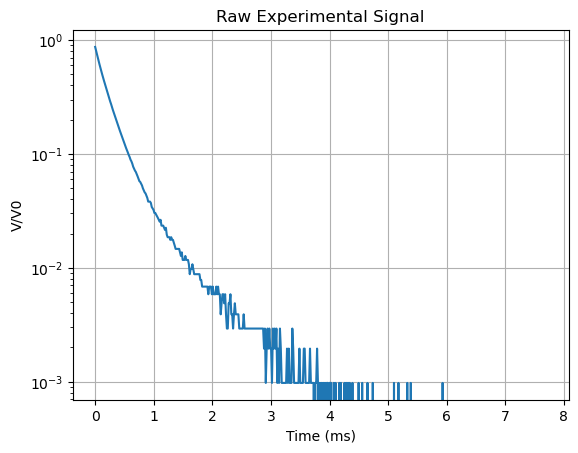

In [ ]:
# --- Load experimental data ---
df = pd.read_csv("Data/sugarsolution2.csv", delimiter=",")
V0 = 5
# Convert dataframe columns to numpy arrays
dt = scc.micro*df.iloc[-1,1]/(df.iloc[-1,0]-1)
t_exp = df.iloc[:, 0].to_numpy()[0:-1]*dt
v_exp = df.iloc[:, 1].to_numpy()[0:-1]/V0

print(f'time step = {dt/scc.micro:5.3f} micro-s')

# Optionally plot raw data
plt.plot(t_exp /scc.milli, v_exp)
plt.xlabel("Time (ms)")
plt.ylabel("V/V0")
plt.title("Raw Experimental Signal")
plt.yscale('log')
plt.grid(True)
plt.show()


In [43]:
def prepare_symmetric_signal(t_data, v_data):
    """
    Create a symmetric signal with:
    - First third: zeros
    - Second third: max(v_data) - v_data[n]
    - Final third: original v_data

    Parameters:
        t_data (np.ndarray): Original time data (used only for time spacing).
        v_data (np.ndarray): Original voltage data (1D array).

    Returns:
        t_sym (np.ndarray): Time array 3× longer than input.
        v_sym (np.ndarray): Symmetrized voltage array.
    """
    v_data = np.asarray(v_data)
    N = len(v_data)
    max_val = np.max(v_data)

    v_first = np.zeros(N)
    v_second = max_val - v_data
    v_third = v_data.copy()

    v_sym = np.concatenate([v_first, v_second, v_third])

    # Uniform time spacing based on original
    dt = t_data[1] - t_data[0]  # assume uniform
    t_sym = np.arange(3 * N) * dt

    return t_sym, v_sym


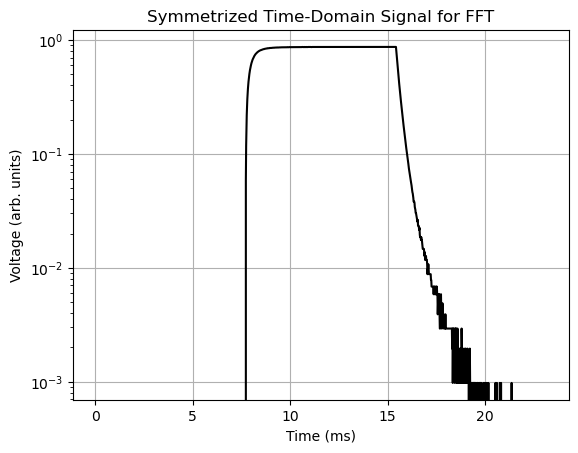

In [63]:
# --- Prepare symmetric version ---
from scipy.ndimage import gaussian_filter1d
t, v_t = prepare_symmetric_signal(t_exp, v_exp)

# Plot symmetric result
plt.plot(t * 1e3, v_t,'-k')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (arb. units)")
plt.title("Symmetrized Time-Domain Signal for FFT")
plt.grid(True)
plt.yscale('log')
plt.show()


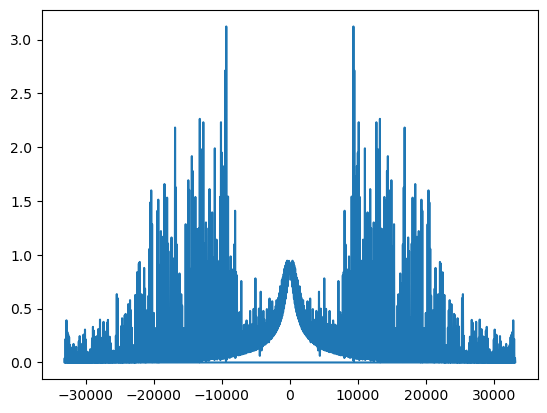

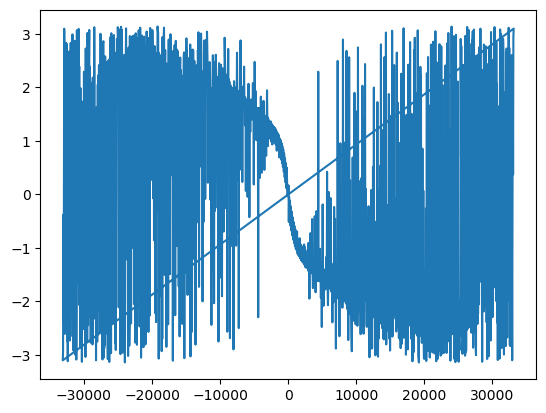

In [73]:
N = np.size(v_t_s) 
v_t_s = gaussian_filter1d(v_t, sigma=1)
u_t = np.zeros(N)
u_t[N//3 : 2*N//3] = 1  
dt = t[1]-t[0]             
U_w = np.fft.fft(u_t) * dt
V_w  = np.fft.fft(v_t_s) * dt 
sig = 1
H_w =  gaussian_filter1d(V_w, sigma=sig)/ gaussian_filter1d(U_w, sigma=sig)
f =  np.fft.fftfreq(N, d=dt) + np.finfo(float).eps  # Angular frequency [rad/s]
w = 2*np.pi*f
plt.figure()
plt.plot(f,np.abs(H_w))
# plt.xlim(-1000,1000)
plt.show()
plt.plot(f,np.angle(H_w))
# plt.xlim(-1000,1000)


In [46]:
# --- TODO: Run FFT and extract H(ω), ε(ω), etc. ---
# Follow same process as simulation notebook:
# - Compute U(w) from symmetrized input
# - Recover H(w) from V(w)/U(w)
# - Use inverse model to extract ε(w)

# Optionally save t_sym and v_sym for later
# np.savetxt("symmetrized_signal.csv", np.column_stack((t_sym, v_sym)), delimiter=",")
